In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from collections import Counter
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [44]:
# Define the directory where your dataset is located
dataset_dir = "/Users/pythonista/Desktop/dataset"

# Define image dimensions and batch size
img_width, img_height = 100, 100
batch_size = 16


In [49]:
# Define classes (logo categories) with consistent indices
classes = ['Starbucks', 'Nike', 'Burger King', 'Dunkin\' Donuts', 'Pepsi', 'McDonald\'s', 'Coca-Cola']

# Create ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting data into training and validation sets
)

# Load and preprocess training data with consistent class indices
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  
    #classes=classes     
)

# Load and preprocess validation data with consistent class indices
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  
    
)


Found 1515 images belonging to 7 classes.
Found 375 images belonging to 7 classes.


In [50]:
import json

# Save class indices
class_indices_path = "./class_indices.json"
with open(class_indices_path, "w") as f:
    json.dump(train_generator.class_indices, f)

In [51]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer with softmax activation
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,679 (6.61 MB)

 Trainable params: 1,732,679 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.2394 - loss: 1.8849 - val_accuracy: 0.5054 - val_loss: 1.3610
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.6875 - loss: 0.5353 - val_accuracy: 0.4286 - val_loss: 0.6907
Epoch 3/50


2024-03-26 15:45:09.409106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-03-26 15:45:09.422009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.4867 - loss: 1.4385 - val_accuracy: 0.5489 - val_loss: 1.2845
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.6250 - loss: 0.7117 - val_accuracy: 0.8571 - val_loss: 0.2430
Epoch 5/50


2024-03-26 15:45:21.123776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:45:21.135047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.5585 - loss: 1.2562 - val_accuracy: 0.6223 - val_loss: 1.0737
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - accuracy: 0.7500 - loss: 0.4451 - val_accuracy: 0.5714 - val_loss: 0.6435
Epoch 7/50


2024-03-26 15:45:32.962527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:45:32.974505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.6199 - loss: 1.1206 - val_accuracy: 0.6168 - val_loss: 1.0927
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - accuracy: 0.5625 - loss: 0.5635 - val_accuracy: 0.5714 - val_loss: 0.5283
Epoch 9/50


2024-03-26 15:45:44.907331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:45:44.916941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.6226 - loss: 1.0785 - val_accuracy: 0.6603 - val_loss: 0.9580
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.5625 - loss: 0.5849 - val_accuracy: 0.5714 - val_loss: 0.5594
Epoch 11/50


2024-03-26 15:45:56.762465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:45:56.777039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.7003 - loss: 0.9349 - val_accuracy: 0.6766 - val_loss: 0.9505
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.8125 - loss: 0.3524 - val_accuracy: 0.7143 - val_loss: 0.2898
Epoch 13/50


2024-03-26 15:46:08.781456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:46:08.796773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.6786 - loss: 0.9182 - val_accuracy: 0.6902 - val_loss: 0.8545
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 0.5718 - val_accuracy: 0.8571 - val_loss: 0.1713
Epoch 15/50


2024-03-26 15:46:20.625144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:46:20.722002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7098 - loss: 0.8619 - val_accuracy: 0.6929 - val_loss: 0.9494
Epoch 16/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6875 - loss: 0.4138 - val_accuracy: 0.4286 - val_loss: 0.6119
Epoch 17/50


2024-03-26 15:46:32.672103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:46:32.803027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.7154 - loss: 0.8612 - val_accuracy: 0.6984 - val_loss: 0.8945
Epoch 18/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8125 - loss: 0.3080 - val_accuracy: 0.5714 - val_loss: 0.3610
Epoch 19/50


2024-03-26 15:46:45.254205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:46:45.277508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.7138 - loss: 0.8705 - val_accuracy: 0.7228 - val_loss: 0.8919
Epoch 20/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.5625 - loss: 0.5009 - val_accuracy: 0.7143 - val_loss: 0.4423
Epoch 21/50


2024-03-26 15:46:57.062652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:46:57.076330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.7370 - loss: 0.7429 - val_accuracy: 0.7255 - val_loss: 0.8443
Epoch 22/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8750 - loss: 0.2860 - val_accuracy: 0.7143 - val_loss: 0.3518
Epoch 23/50


2024-03-26 15:47:08.972373: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:47:09.038978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7158 - loss: 0.7738 - val_accuracy: 0.7391 - val_loss: 0.8438
Epoch 24/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8750 - loss: 0.2425 - val_accuracy: 0.8571 - val_loss: 0.4495
Epoch 25/50


2024-03-26 15:47:20.922421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:47:20.985270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.7377 - loss: 0.7477 - val_accuracy: 0.7120 - val_loss: 0.8141
Epoch 26/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.4161 - val_accuracy: 0.5714 - val_loss: 0.5325
Epoch 27/50


2024-03-26 15:47:32.819470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:47:32.914422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7441 - loss: 0.7543 - val_accuracy: 0.7446 - val_loss: 0.7381
Epoch 28/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.6250 - loss: 0.4575 - val_accuracy: 0.8571 - val_loss: 0.0992
Epoch 29/50


2024-03-26 15:47:44.854797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:47:44.866879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.7762 - loss: 0.6650 - val_accuracy: 0.7092 - val_loss: 0.8260
Epoch 30/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7500 - loss: 0.3090 - val_accuracy: 0.5714 - val_loss: 0.5086
Epoch 31/50


2024-03-26 15:47:56.526383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:47:56.574417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.7889 - loss: 0.6360 - val_accuracy: 0.7310 - val_loss: 0.8422
Epoch 32/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8125 - loss: 0.3493 - val_accuracy: 0.7143 - val_loss: 0.8147
Epoch 33/50


2024-03-26 15:48:08.407989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:48:08.458138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.7709 - loss: 0.6739 - val_accuracy: 0.7418 - val_loss: 0.8164
Epoch 34/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.2480 - val_accuracy: 0.5714 - val_loss: 0.5164
Epoch 35/50


2024-03-26 15:48:20.079540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:48:20.212990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.7983 - loss: 0.5826 - val_accuracy: 0.6902 - val_loss: 0.8607
Epoch 36/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.7500 - loss: 0.2760 - val_accuracy: 0.5714 - val_loss: 1.0707
Epoch 37/50


2024-03-26 15:48:32.084798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:48:32.095253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.7633 - loss: 0.6787 - val_accuracy: 0.7391 - val_loss: 0.8451
Epoch 38/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.8125 - loss: 0.1952 - val_accuracy: 0.7143 - val_loss: 0.2481
Epoch 39/50


2024-03-26 15:48:44.221898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:48:44.249750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.7670 - loss: 0.6746 - val_accuracy: 0.7663 - val_loss: 0.7236
Epoch 40/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7500 - loss: 0.3112 - val_accuracy: 0.5714 - val_loss: 0.9229
Epoch 41/50


2024-03-26 15:48:56.136739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:48:56.177515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.7858 - loss: 0.6121 - val_accuracy: 0.7745 - val_loss: 0.7237
Epoch 42/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - accuracy: 0.8125 - loss: 0.3782 - val_accuracy: 0.8571 - val_loss: 0.2346
Epoch 43/50


2024-03-26 15:49:08.173362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:49:08.184596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.7903 - loss: 0.6066 - val_accuracy: 0.7717 - val_loss: 0.7609
Epoch 44/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.6250 - loss: 0.4809 - val_accuracy: 0.7143 - val_loss: 0.2919
Epoch 45/50


2024-03-26 15:49:20.430226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:49:20.494061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.8120 - loss: 0.5711 - val_accuracy: 0.7609 - val_loss: 0.7374
Epoch 46/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.5625 - loss: 0.4631 - val_accuracy: 0.5714 - val_loss: 0.5718
Epoch 47/50


2024-03-26 15:49:32.890837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:49:32.901228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.8188 - loss: 0.5133 - val_accuracy: 0.7582 - val_loss: 0.7188
Epoch 48/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8750 - loss: 0.1952 - val_accuracy: 1.0000 - val_loss: 0.0830
Epoch 49/50


2024-03-26 15:49:45.172569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:49:45.186049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.8222 - loss: 0.5249 - val_accuracy: 0.7418 - val_loss: 0.7504
Epoch 50/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.9375 - loss: 0.0826 - val_accuracy: 0.8571 - val_loss: 0.5120


2024-03-26 15:49:57.641819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-26 15:49:57.654728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.7891 - loss: 0.6288
Validation Accuracy: 78.67%


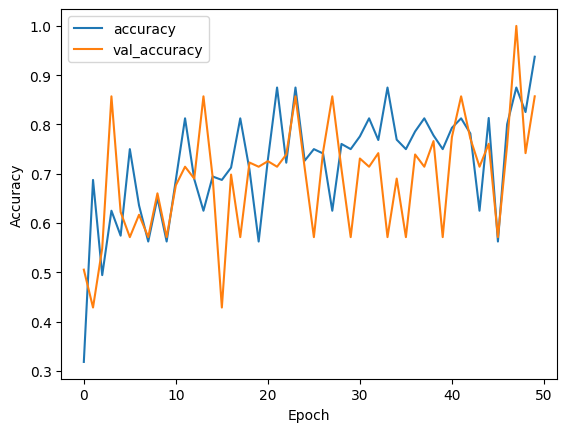

In [53]:
# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Execute following for testing an image

In [121]:
model_path = "./logo_detection_model.h5"  # Path to your trained model

In [122]:
image_path = "/Users/pythonista/Desktop/dataset/mcdonalds_logo/"

In [123]:
# Load class indices during production testing
with open(class_indices_path, "r") as f:
    class_indices = json.load(f)

In [124]:
def load_and_preprocess_image(image_path, target_size=(100, 100)):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert image to array and preprocess it
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

model = load_model(model_path)

def predict_logo(image_path, model_path):
    # Load the trained model
    #model = load_model(model_path)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize image
    predictions = model.predict(img_array, verbose=0)
    predicted_class_index = np.argmax(predictions)
    predicted_class = [class_name for class_name, index in class_indices.items() if index == predicted_class_index][0]
    return predicted_class

In [144]:
def iterate_in_folder_and_predict(image_path):
    res= []
    total_items = 0
    for item in os.listdir(image_path):
        item_path = os.path.join(image_path, item)
        if os.path.isfile(item_path):
            try:
                predicted_logo = predict_logo(item_path, model_path)
                res.append(predicted_logo)
                #print(predict_logo)
                total_items = total_items + 1
            except Exception as e:
                print("Threw ex for image ", item)
                #print(e)
    label_dict = Counter(res)
    true_label_name = image_path.split("/")[-1]
    print(label_dict)
    print(true_label_name)
    #print("Ground truth ", true_label_name)
    correctly_predicted_items = label_dict[true_label_name]
    accuracy = correctly_predicted_items / total_items
    print("Accuracy for ", true_label_name, " = ", accuracy)
    return accuracy, true_label_name
    

In [145]:
print("Ground truth ", image_path.split("/")[-2])


Ground truth  mcdonalds_logo


def get_accuracy(res, total_items, image_path):
    label_dict = Counter(res)
    true_label_name = image_path.split("/")[-2]
    #print("Ground truth ", true_label_name)
    correctly_predicted_items = label_dict[true_label_name]
    accuracy =  (correctly_predicted_items * 1.0 )/ total_items
    #print("Accuracy for ", true_label_name, " = ", accuracy)
    return accuracy, true_label_name

In [148]:
def final_predictions_for_all_folders(parent_dir):
    acc_dir = {}
    for directory in os.listdir(parent_dir):
        dir_path = os.path.join(parent_dir, directory)
        #print("checking ", dir_path)
        if(os.path.isdir(dir_path)):
            print("Processing ", dir_path)
            accuracy, true_label_name = iterate_in_folder_and_predict(dir_path)
            print("Compiling and storing accuracy ")
            accuracy, true_label_name = get_accuracy(res, total_items, dir_path)
            acc_dir[true_label_name] = accuracy
            return acc_dir

In [149]:
parent_dir = "/Users/pythonista/Desktop/dataset/"

In [154]:
accuracy, true_label_name = iterate_in_folder_and_predict("/Users/pythonista/Desktop/dataset/pepsi_logo")

Threw ex for image  pepsi.svg
Threw ex for image  .DS_Store
Threw ex for image  vector.svg
Threw ex for image  vector9.svg
Threw ex for image  vector8.svg
Threw ex for image  vector3.svg
Threw ex for image  vector2.svg
Threw ex for image  vector6.svg
Threw ex for image  vector7.svg
Threw ex for image  vector5.svg
Threw ex for image  vector4.svg
Counter({'pepsi_logo': 195, 'cocacola_logo': 22, 'nike_logo': 16, 'burgerking_logo': 8, 'mcdonalds_logo': 7, 'starbucks_logo': 4})
pepsi_logo
Accuracy for  pepsi_logo  =  0.7738095238095238


In [164]:
predicted_logo = predict_logo("/Users/pythonista/Desktop/dataset/pepsi_logo/images25.jpg", model_path)
predicted_logo

'burgerking_logo'